
Data analysis and predictive modelling can help us understand data better and make smarter decisions.

We will use machine learning algorithms to analyse the Titanic dataset,which is a popular dataset in the data science community. Our goal is to perform EDA and implement the KNN algorithm to predict whether passengers survived the sinking of the Titanic.

The Titanic dataset is a real-world dataset that offers an opportunity to learn more about the sinking of the Titanic. We will use EDA to uncover patterns, trends, and relationships in the data. We will also build a predictive model to estimate
the likelihood of survival for Titanic passengers.

This project demonstrates how to use data analysis and machine learning techniques to analyse the Titanic dataset. We will preprocess the data, perform EDA, and implement a KNN model for classification. By the end of this report, we will have a comprehensive understanding of the dataset, the process we followed, and the insights gained from our analysis.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Our dataset has 891 entries and 12 columns || 
some values for Age, Cabin and Embarked are missing

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


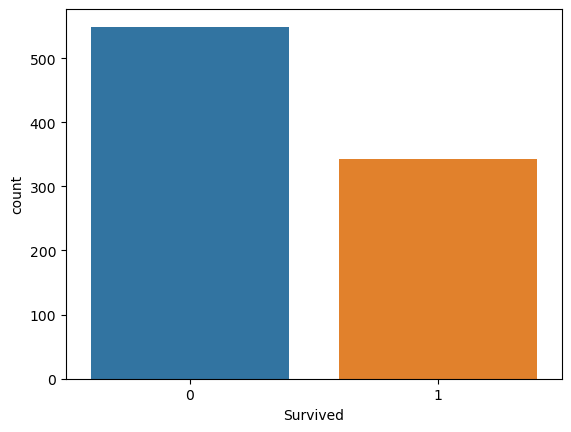

In [6]:
sns.countplot(x='Survived', data=df);

In [7]:
print(df.Survived.sum()/df.Survived.count())

0.3838383838383838


We see that only 38% people survived 

In [8]:
df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

We see that number of female survived is greater 
than number of male survived

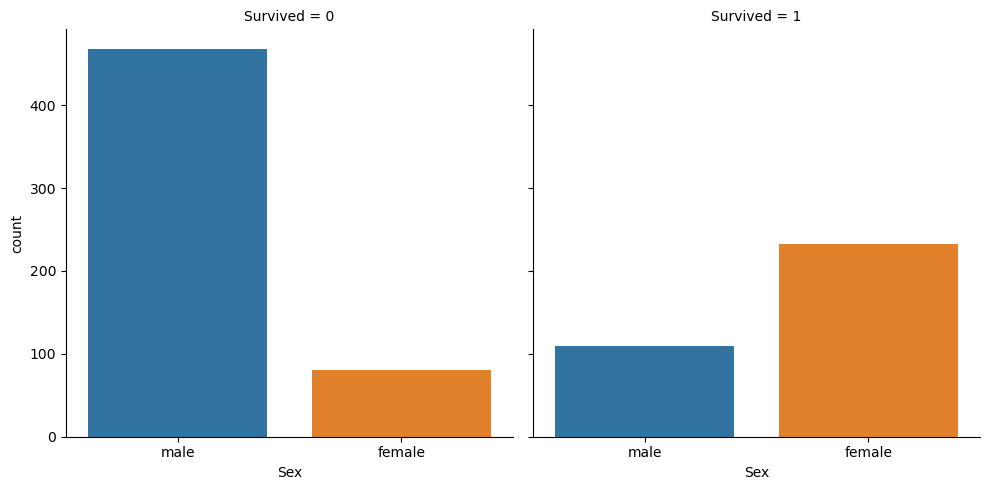

In [9]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df);

Also the number of male couldn't survive is greater than that of female

In [10]:
print('Percentage of Female Survived: ', df[df['Sex']=='female'].Survived.sum()/df[df['Sex']=='female'].Survived.count())
print('Percentage of Male Survived: ', df[df['Sex']=='male'].Survived.sum()/df[df['Sex']=='male'].Survived.count())


Percentage of Female Survived:  0.7420382165605095
Percentage of Male Survived:  0.18890814558058924


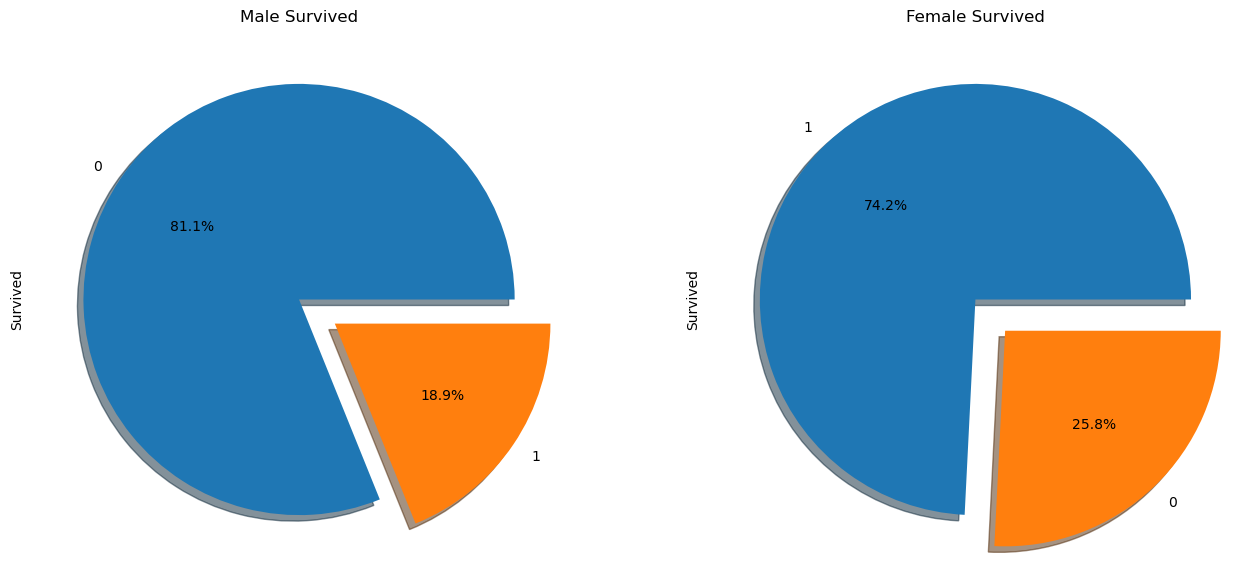

In [11]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],
                                                          autopct='%1.1f%%',
                                                           ax=ax[0],
                                                          shadow=True);
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],
                                                          autopct='%1.1f%%',
                                                           ax=ax[1],
                                                          shadow=True);

ax[0].set_title('Male Survived')
ax[1].set_title('Female Survived')

plt.show()

this pie chart shows us that the percentage of female who survived is greater
than that of male

In [12]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(
    cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [13]:
print('Percentage of survival: ')
print('Pclass=1: ', df.Survived[df.Pclass == 1].sum()/df.Survived[df.Pclass == 
                                                         1].count())
print('Pclass=1: ', df.Survived[df.Pclass == 2].sum()/df.Survived[df.Pclass == 
                                                         2].count())
print('Pclass=1: ', df.Survived[df.Pclass == 3].sum()/df.Survived[df.Pclass == 
                                                         3].count())

Percentage of survival: 
Pclass=1:  0.6296296296296297
Pclass=1:  0.47282608695652173
Pclass=1:  0.24236252545824846


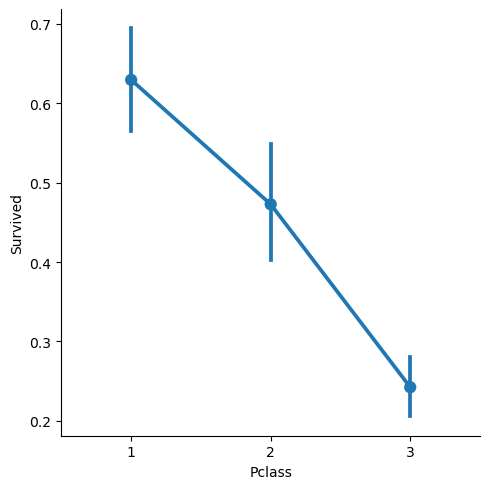

In [14]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df);

So it is clear that people in higher class cabin were 
given more priority while rescuing

people say that money doesn't matter, but actually money matters ;(

### Pclass vs Sex vs Survived

In [15]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(
cmap='autumn_r')

In Pclass 1, almost all women survived, while in Pclass 2 & 3
maximum number of men died

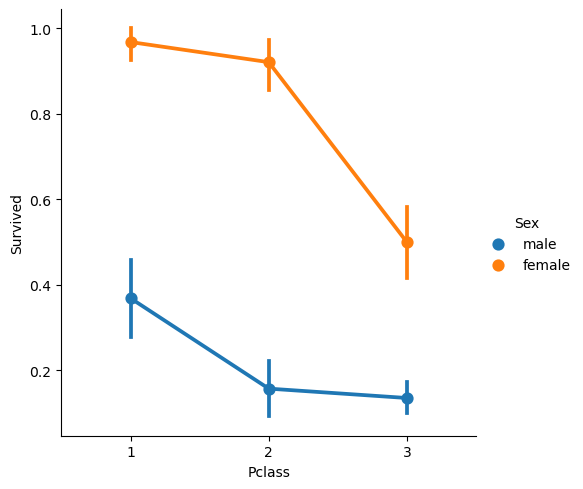

In [16]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df);

### working with embarked[boarding point]

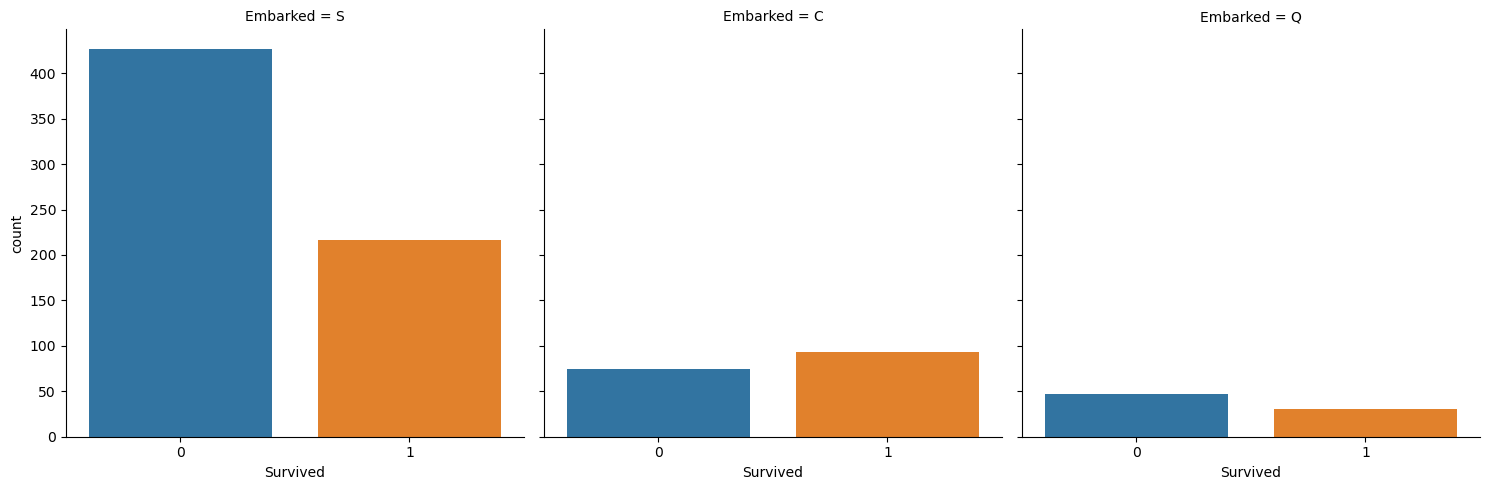

In [17]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

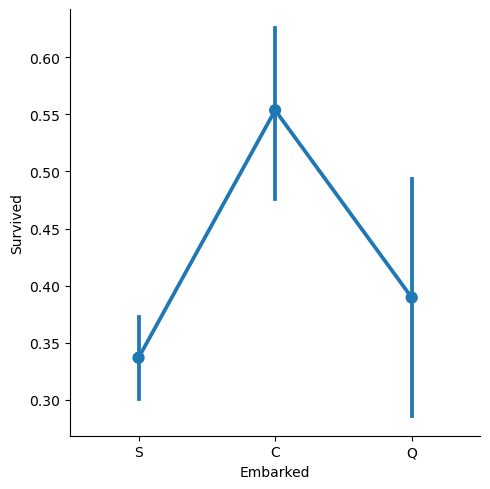

In [18]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=df);

#### Survival rate is Highest for Cherbourg(C) and lowest for Southampton(S)

### Embarked vs Sex

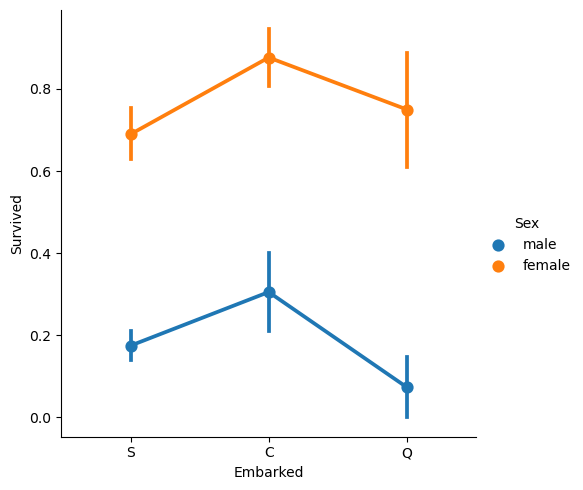

In [19]:
sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='point', data=df);

#### for both men and women Survival rate is Highest for Cherbourg(C)
#### for women -- lowest Survival rate is for Southampton(S)
#### for men -- lowest Survival rate is for Queenstown(Q)

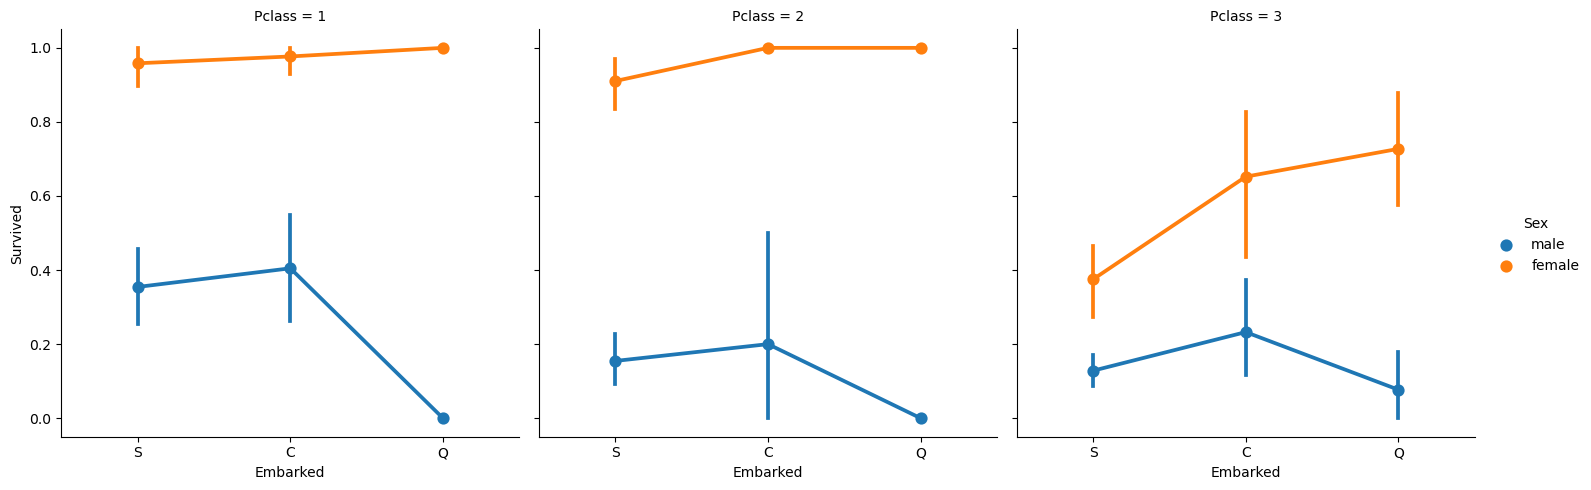

In [20]:
sns.catplot(x='Embarked', y='Survived', col='Pclass', hue='Sex', kind='point', data=df);

 Women in Pclass 2 who boarded in C and Q had an almost perfect survival  rate, while the majority of Pclass 1 women also survived.

None of the men in Pclass 1 and 2 who boarded in Q survived, and the survival rate for men in Pclass 2 and 3 was consistently below 0.2.

Men in Pclass 1 who boarded in S and Q had a survival rate of approximately 0.4, which is higher compared to the other men in the same class.

In [21]:
pd.crosstab([df.Survived], [df.Sex, df.Pclass, df.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [22]:
df.Age.min()

0.42

In [23]:
df.Age.max()

80.0

In [24]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [25]:
result = pd.crosstab(df.Survived, [df.AgeGroup, df.Sex])

In [26]:
result

AgeGroup    0-9       10-19       20-29       30-39       40-49       50-59  \
Sex      female male female male female male female male female male female   
Survived                                                                      
0            12   14     12   59     20  126      9   77     10   43      1   
1            19   19     34   10     61   23     46   23     21   12     13   

AgeGroup       60-69      70-79  
Sex      male female male  male  
Survived                         
0          24      0   13     4  
1           4      3    1     1

#### the majority of females in various age groups survived, 
#### with higher numbers in most cases compared to males
#### the "20-29" age group has a relatively high number of survivors, especially among females
#### There's a clear disparity in survival between males and females, with more females surviving in most age groups.
#### This aligns with historical records from the Titanic disaster, which indicated a preference for women and 
#### children during the rescue process.

In [27]:
(result.div(result.sum(1), axis=0) * 100).round(2) ## percentage

AgeGroup    0-9        10-19         20-29         30-39         40-49         \
Sex      female  male female   male female   male female   male female   male   
Survived                                                                        
0          2.83  3.30   2.83  13.92   4.72  29.72   2.12  18.16   2.36  10.14   
1          6.55  6.55  11.72   3.45  21.03   7.93  15.86   7.93   7.24   4.14   

AgeGroup  50-59        60-69       70-79  
Sex      female  male female  male  male  
Survived                                  
0          0.24  5.66   0.00  3.07  0.94  
1          4.48  1.38   1.03  0.34  0.34

In [28]:
pd.crosstab(df.AgeGroup, df.Sex)

Sex,female,male
AgeGroup,,
0-9,31,33
10-19,46,69
20-29,81,149
30-39,55,100
40-49,31,55
50-59,14,28
60-69,3,14
70-79,0,5


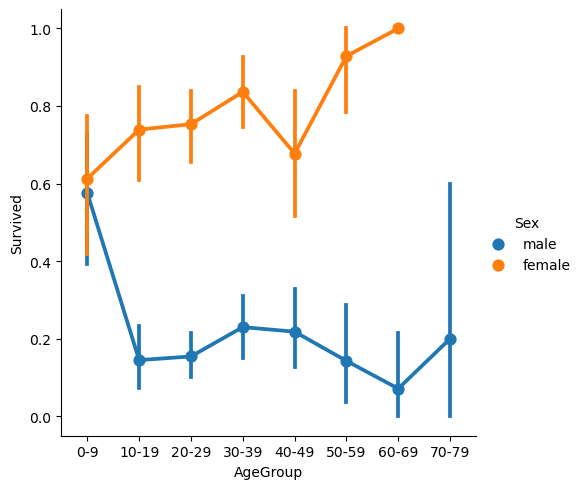

In [29]:
sns.catplot(x='AgeGroup', y='Survived', hue='Sex', kind='point', data=df);

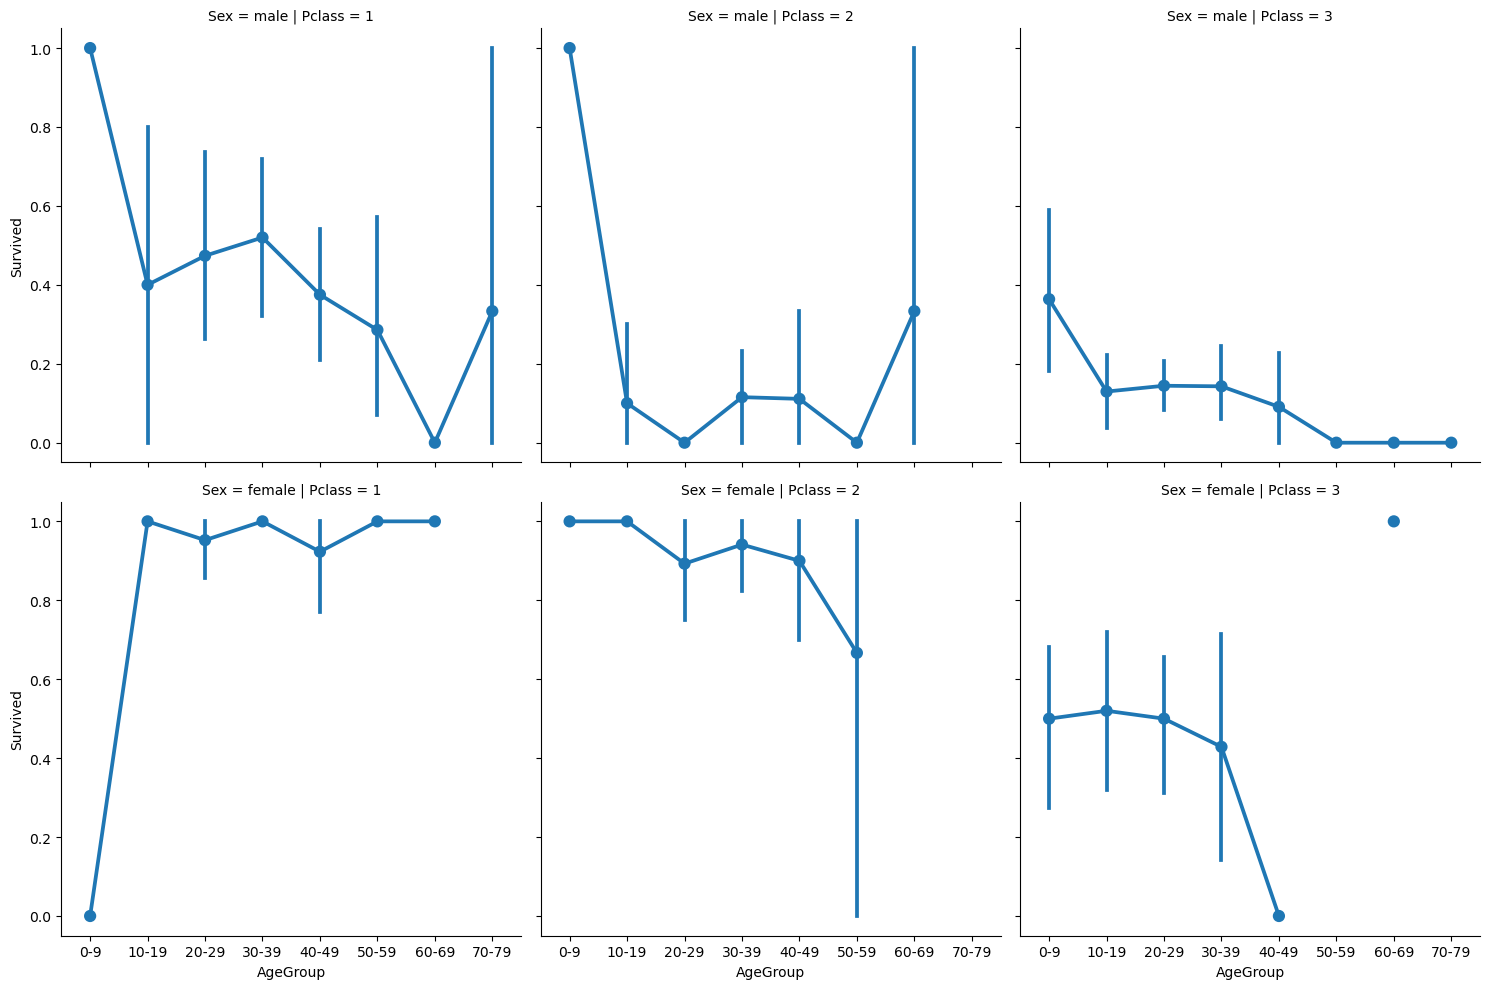

In [30]:
sns.catplot(x='AgeGroup',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df);

In [31]:
pd.crosstab([df.Sex, df.Survived], [df.AgeGroup, df.Pclass], margins=True
           ).style.background_gradient(cmap='autumn_r')

All females in Pclass = 1 & 2 in AgeGroup(10-19) survived

All females in Pclass = 1 in AgeGroup(50-59) survived

All males in Pclass = 2 in AgeGroup(20-29) died

In [32]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### SibSp and Parch ---- Siblings//Spouse and Parents//Children

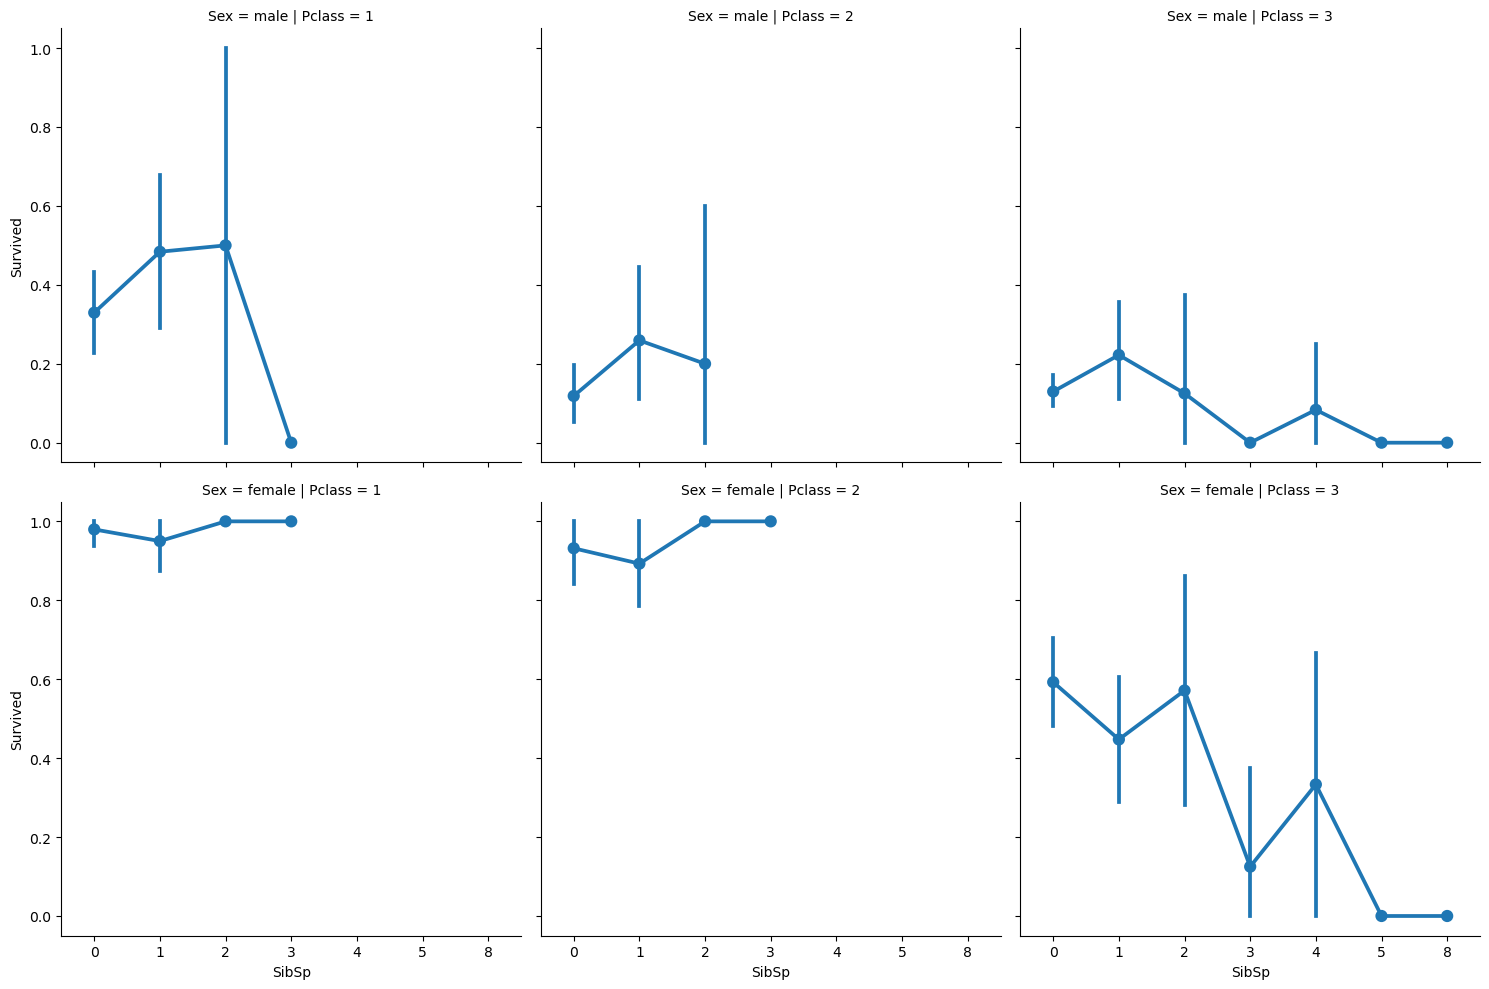

In [33]:
sns.catplot(x='SibSp', y='Survived', col='Pclass', row='Sex', kind='point', data=df);

In [34]:
pd.crosstab([df.Sex, df.Survived], [df.SibSp, df.Pclass], margins=True
           ).style.background_gradient(cmap='autumn_r')

    Among male passengers, the survival rate is consistently below 0.5 for all values of SibSp 

    Among female passengers, those with SibSp = 3 and Pclass = 3 did not survive.
    
    Additionally, all females with SibSp greater than 4 also did not survive.

    For females with SibSp = 1 and Pclass = 3, the survival rate is less than 0.5,
    
    indicating that less than half of them survived.

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


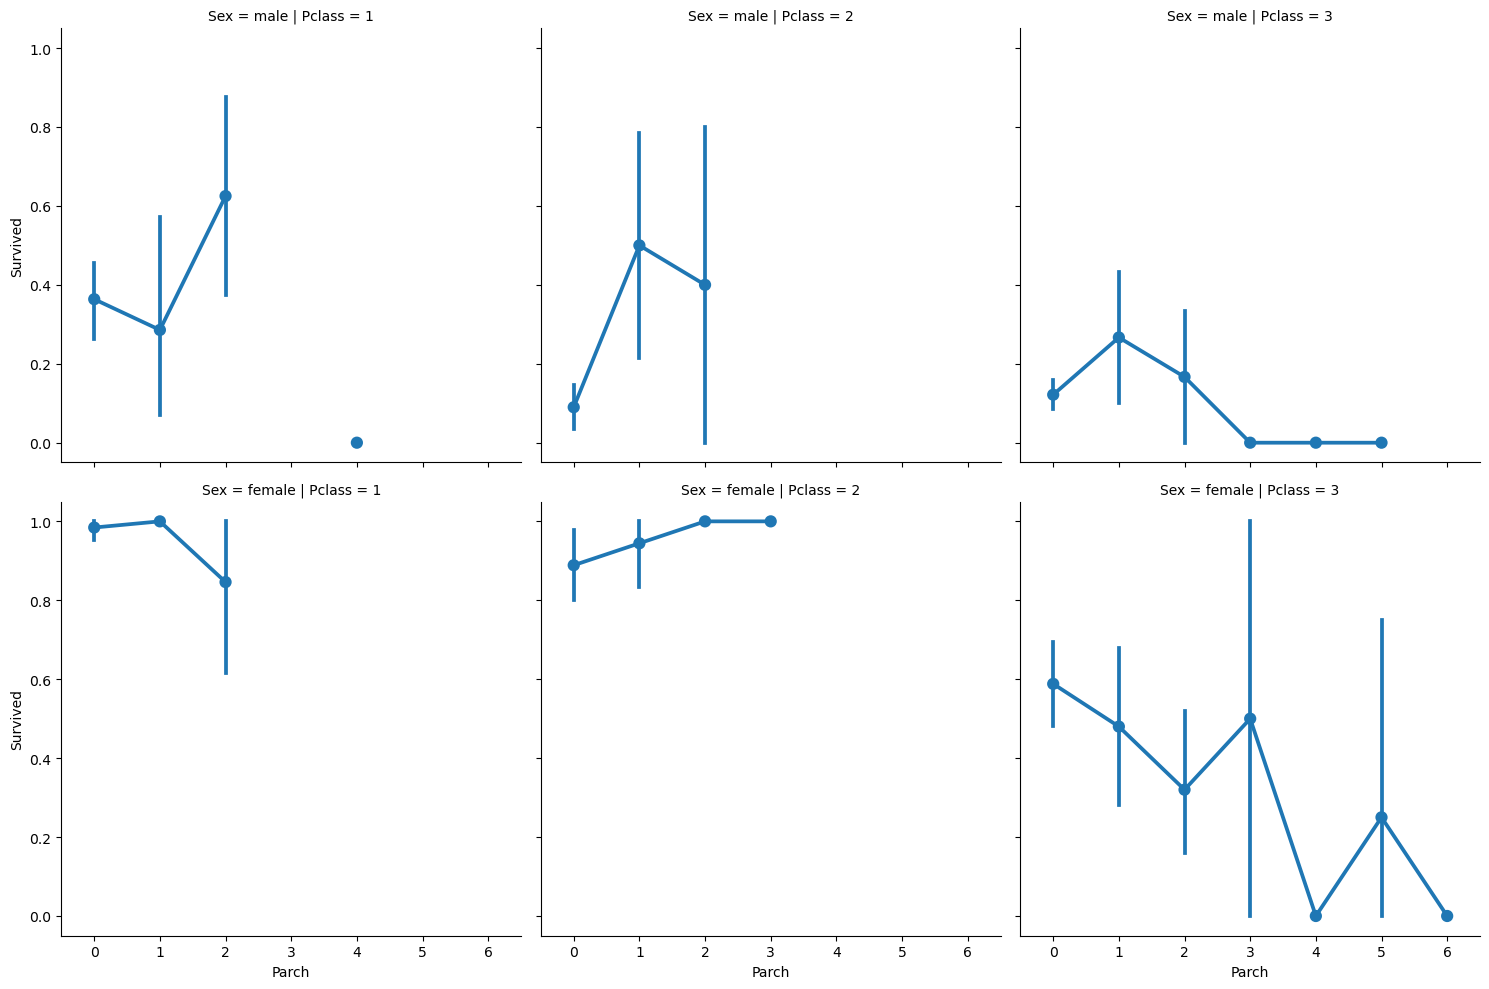

In [36]:
sns.catplot(x='Parch',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df);

In [37]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True
           ).style.background_gradient(cmap='autumn_r')

    Among females with Parch = 2 and Pclass = 3, the survival rate is below 0.5, indicating that less than half of them survived.

    All females with Parch = 4 and Pclass = 3 did not survive. Similarly, all females with Parch greater than 4 also did not survive.

    For females with Parch = 1 and Pclass = 3, the survival rate is below 0.5, signifying that less than half of them survived.

    Among male passengers, the survival rate is consistently below 0.5 for all values of Parch, except for those with Parch = 2 and Pclass = 1, where the survival rate is above 0.5.

In [38]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
fare_labels = [1,2,3,4,5,6,7,8,9,10,11]

df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

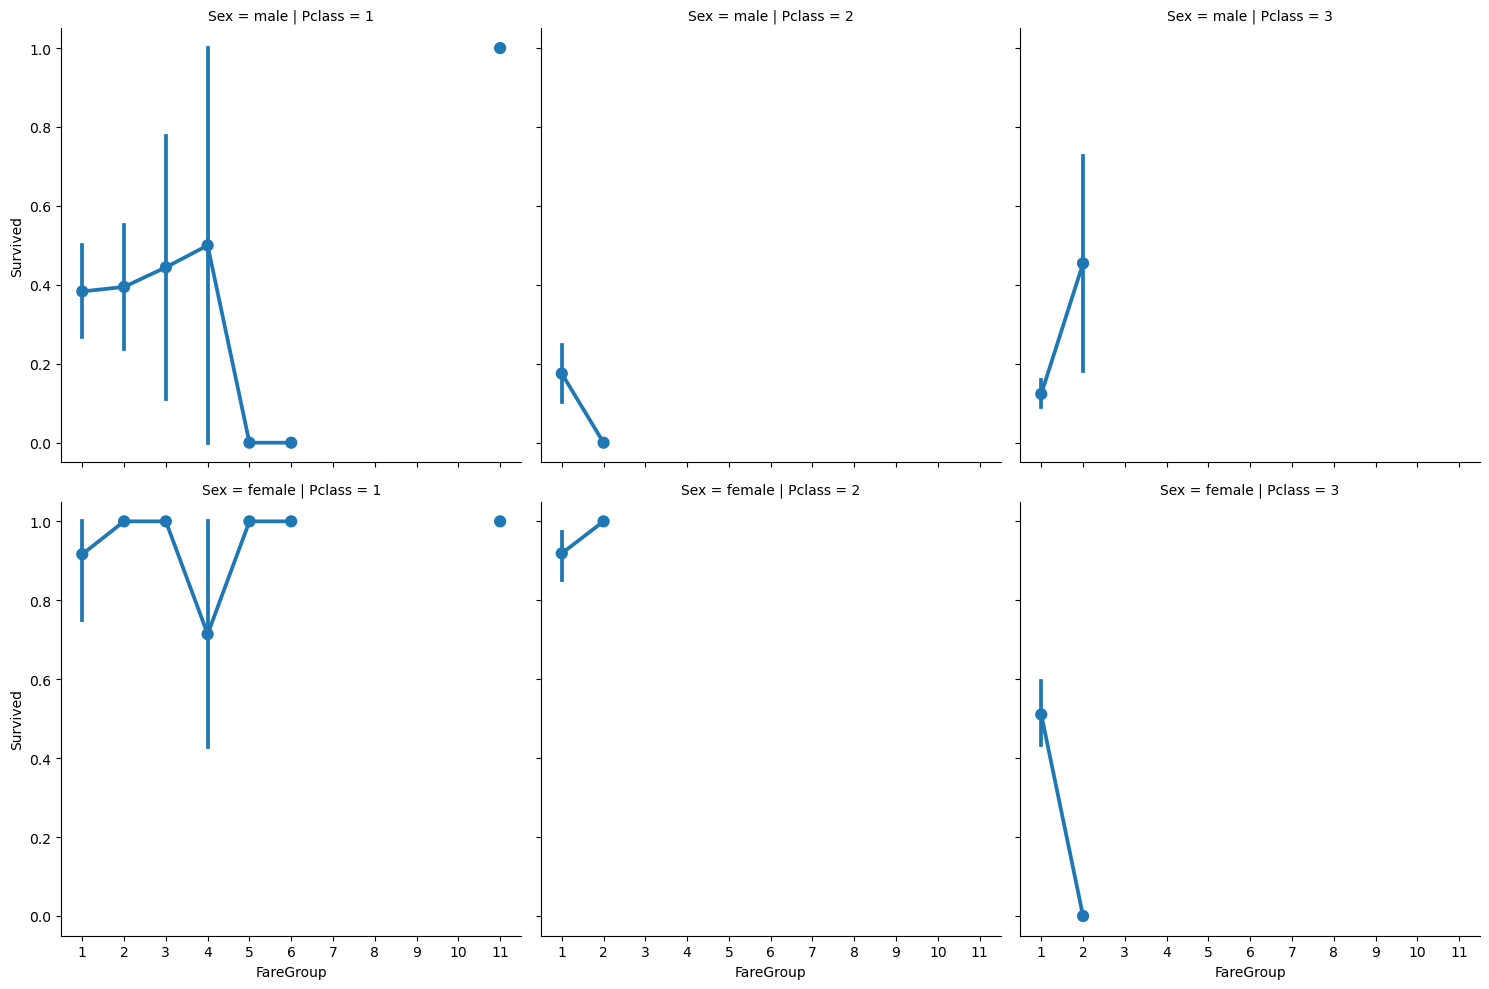

In [40]:
sns.catplot(x='FareGroup',y='Survived', col='Pclass' , row = 'Sex', kind='point', data=df);

In [41]:
pd.crosstab([df.Sex, df.Survived], [df.FareGroup, df.Pclass], margins=True
           ).style.background_gradient(cmap='autumn_r')

All females in FareGroup 3,5,6,11 survived

No male in FareGroup 2 and Pclass=2 survived

## Preparing Data

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39,1


In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FareGroup       15
dtype: int64

In [44]:
df.drop('AgeGroup', axis=1, inplace=True)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [46]:
df.drop('FareGroup', axis=1, inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.drop(['Name','Ticket','Cabin','Fare'], axis=1, inplace=True)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [50]:
df['Family'] = df['SibSp'] + df['Parch'] + 1 ## combining Siblings and Parents

In [51]:
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)


In [52]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.613459
min,1.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,11.000000


### Data Cleaning

In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Family           0
dtype: int64

In [55]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [56]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       2
Family         0
dtype: int64

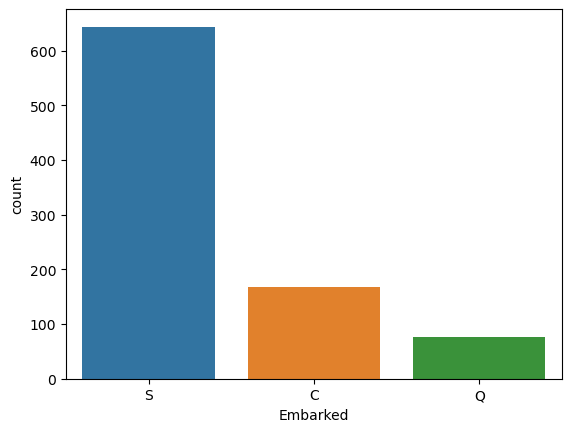

In [57]:
sns.countplot(x='Embarked',data=df);

In [58]:
df["Embarked"].fillna("S", inplace=True)

In [59]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family         0
dtype: int64

In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,1.904602
std,257.353842,0.486592,0.836071,13.019697,1.613459
min,1.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,11.000000


In [61]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [62]:
df['Sex'].replace(['male', 'female'], [1,0], inplace=True)

In [63]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()

encoded_embarked = encoder.fit_transform(df['Embarked'].values.reshape(-1, 1))

encoded_df = pd.DataFrame(encoded_embarked.toarray(), columns=encoder.get_feature_names_out(['Embarked']))

df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=['Embarked'])

In [64]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,2,0.0,0.0,1.0
1,2,1,1,0,38.0,2,1.0,0.0,0.0
2,3,1,3,0,26.0,1,0.0,0.0,1.0
3,4,1,1,0,35.0,2,0.0,0.0,1.0
4,5,0,3,1,35.0,1,0.0,0.0,1.0


In [65]:
updated_col_names = {'Embarked_1': 'Embarked_S',
                    'Embarked_2': 'Embarked_C',
                    'Embarked_3': 'Embarked_Q'}
df.rename(columns=updated_col_names, inplace=True)

In [66]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,2,0.0,0.0,1.0
1,2,1,1,0,38.0,2,1.0,0.0,0.0
2,3,1,3,0,26.0,1,0.0,0.0,1.0
3,4,1,1,0,35.0,2,0.0,0.0,1.0
4,5,0,3,1,35.0,1,0.0,0.0,1.0


## Applying KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=25)

In [68]:
X = df.drop('Survived', axis=1)

In [69]:
X

,PassengerId,Pclass,Sex,Age,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,2,0.0,0.0,1.0
1,2,1,0,38.0,2,1.0,0.0,0.0
2,3,3,0,26.0,1,0.0,0.0,1.0
3,4,1,0,35.0,2,0.0,0.0,1.0
4,5,3,1,35.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,1,0.0,0.0,1.0
887,888,1,0,19.0,1,0.0,0.0,1.0
888,889,3,0,28.0,4,0.0,0.0,1.0
889,890,1,1,26.0,1,1.0,0.0,0.0


In [70]:
y = df['Survived']

In [71]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.20,
                                                    random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((712, 8), (179, 8), (712,), (179,))

In [74]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [77]:
y_preds = neigh.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_preds, y_test)

In [79]:
acc

0.770949720670391

In [80]:
for i in range(2, 41):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    
    y_preds_train = neigh.predict(X_train)
    y_preds_test = neigh.predict(X_test)
    
    acc_train = accuracy_score(y_preds_train, y_train)
    print('\nfor n_neighbors=',i,'accuracy score(train data) is',acc_train)
    
    acc_test = accuracy_score(y_preds_test, y_test)
    print('for n_neighbors=',i,'accuracy score(test data) is',acc_test)


for n_neighbors= 2 accuracy score(train data) is 0.8665730337078652
for n_neighbors= 2 accuracy score(test data) is 0.7821229050279329

for n_neighbors= 3 accuracy score(train data) is 0.8623595505617978
for n_neighbors= 3 accuracy score(test data) is 0.7988826815642458

for n_neighbors= 4 accuracy score(train data) is 0.8314606741573034
for n_neighbors= 4 accuracy score(test data) is 0.8156424581005587

for n_neighbors= 5 accuracy score(train data) is 0.8497191011235955
for n_neighbors= 5 accuracy score(test data) is 0.8156424581005587

for n_neighbors= 6 accuracy score(train data) is 0.8455056179775281
for n_neighbors= 6 accuracy score(test data) is 0.7932960893854749

for n_neighbors= 7 accuracy score(train data) is 0.8455056179775281
for n_neighbors= 7 accuracy score(test data) is 0.7877094972067039

for n_neighbors= 8 accuracy score(train data) is 0.8426966292134831
for n_neighbors= 8 accuracy score(test data) is 0.8044692737430168

for n_neighbors= 9 accuracy score(train data) i

## Hyperparameter Tuning

### GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [x for x in range(2,40)],
              'weights': ['uniform', 'distance'],
              'p': [1,2,3],
              'leaf_size': [10,20,30,40]
             }

neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)

clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [82]:
best_params = clf.best_params_
best_params

{'leaf_size': 10, 'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}

In [83]:
neigh = KNeighborsClassifier(n_neighbors=4, p=3, weights='uniform',
                             leaf_size=10)

In [84]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=4, p=3)

In [85]:
y_preds_train = neigh.predict(X_train)
y_preds_test = neigh.predict(X_test)
acc_train = accuracy_score(y_preds_train, y_train)
acc_test = accuracy_score(y_preds_test, y_test)

print('Accuracy of test data: ',acc_test)
print('Accuracy of train data: ',acc_train)

Accuracy of test data:  0.8100558659217877
Accuracy of train data:  0.8300561797752809


### RandomSearchCV

In [86]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_neighbors': [x for x in range(2,40)],
              'weights': ['uniform', 'distance'],
              'p': [1,2,3],
              'leaf_size': [10,20,30,40]
             }

neigh = KNeighborsClassifier()
clf = RandomizedSearchCV(neigh, parameters)

clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 20, 30, 40],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19, 20, 21,
                                                        22, 23, 24, 25, 26, 27,
                                                        28, 29, 30, 31, ...],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [87]:
best_params = clf.best_params_
best_params

{'weights': 'uniform', 'p': 2, 'n_neighbors': 12, 'leaf_size': 10}

In [95]:
neigh = KNeighborsClassifier(n_neighbors=12, p=2, weights='uniform',
                             leaf_size=10)

In [96]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=12)

In [97]:
y_preds_train = neigh.predict(X_train)
y_preds_test = neigh.predict(X_test)
acc_train = accuracy_score(y_preds_train, y_train)
acc_test = accuracy_score(y_preds_test, y_test)

print('Accuracy of test data: ',acc_test)
print('Accuracy of train data: ',acc_train)

Accuracy of test data:  0.8100558659217877
Accuracy of train data:  0.8258426966292135


In [98]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,2,0.0,0.0,1.0
1,2,1,1,0,38.0,2,1.0,0.0,0.0
2,3,1,3,0,26.0,1,0.0,0.0,1.0
3,4,1,1,0,35.0,2,0.0,0.0,1.0
4,5,0,3,1,35.0,1,0.0,0.0,1.0


In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

In [100]:
cm

array([[90, 15],
       [26, 48]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



The overall accuracy of our model is 81%, indicating that it correctly predicted the survival
status for 81% of the samples in the test dataset.

It's worth noting that class 0 (non-survivors) has a higher recall value,
suggesting that our model is better at correctly identifying non-survivors.
On the other hand, class 1 (survivors) has a lower recall, indicating that our model misses some survivors.

The F1-score, which balances precision and recall, is higher for class 0 compared to class 1,
demonstrating that our model performs better at classifying non-survivors.

In summary, our model shows promising results, particularly in identifying non-survivors,
with a weighted average F1-score of 0.81.
However, there is room for improvement in correctly identifying survivors. 
These results can serve as a foundation for further
refinement and optimization of our predictive model.